In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import random
import statistics


In [2]:
data = pd.read_csv('tests.csv', sep=';')
data.available_connections = data.available_connections.apply(ast.literal_eval)
data.available_connections = data.available_connections.apply(sorted)
data.available_connections = data.available_connections.apply(tuple)

In [3]:
def create_sample_tasks(days, per_day, file_name):
    C = [
        'wifi_public_no_passwd',
        'wifi_public_passwd',
        'cellular',
        'wifi_priv_known',
    ]

    month_of_tasks = [[(random.choice(range(5000, 100000+1, 5000)), tuple(sorted(random.sample(C, random.choice(range(len(C)))))), random.choice(range(5)), random.choice([True, False])) for __ in range(per_day)] for _ in range(days)]

    with open(file_name, 'w') as fp:
        fp.write(str(month_of_tasks))
    return month_of_tasks

def read_sample_tasks(file_name):
    with open(file_name, 'r') as fp:
        month_of_tasks = ast.literal_eval(fp.read())

    return month_of_tasks

In [4]:
month_of_tasks = read_sample_tasks('month_of_tasks.txt')

In [ ]:
filtered_by_speed = data[data.with_vpn == False][data.priority == 'speed'].reset_index(drop=True)
month_of_tasks_speed = [[
    filtered_by_speed[
    (filtered_by_speed.task_metric == execution[0]) &
    (filtered_by_speed.available_connections == execution[1]) &
    (filtered_by_speed.data_security == execution[2])
    ]
    for execution in day] for day in month_of_tasks]

In [ ]:
filtered_by_speed_no_sec = data[data.with_vpn == False][data.priority == 'speed-not-secure'].reset_index(drop=True)
month_of_tasks_speed_no_sec = [[
    filtered_by_speed_no_sec[
    (filtered_by_speed_no_sec.task_metric == execution[0]) &
    (filtered_by_speed_no_sec.available_connections == execution[1]) &
    (filtered_by_speed_no_sec.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks]

In [ ]:
totally_random = data[data.with_vpn == False][data.priority == 'true-random'].reset_index(drop=True)
month_totally_random = [[
    totally_random[
    (totally_random.task_metric == execution[0]) &
    (totally_random.available_connections == execution[1]) &
    (totally_random.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks]


In [ ]:
# wykres 1
x = ['speed and secure', 'speed without secure', 'completely random']
y = [
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed])/len(month_of_tasks_speed),
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/len(month_of_tasks_speed_no_sec),
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_totally_random])/len(month_totally_random),
]
stdev = [
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed])/2,
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/2,
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_totally_random])/2,
]
with open('./plots/numberOne.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one.capitalize()}, {two}, {three}\n')
plt.errorbar(x,y,stdev)

In [ ]:
# wykres wybranych serwisów w zależności od bezpieczeństwa
U = [
    'cloud_commercial',
    'cloud_own',
    'pc',
    'mobile'
]
x = [0,1,2,3,4]
y = []
for sec in x:
    d = {u:0 for u in U}
    for day in month_of_tasks_speed:
        for task in day:
            if (int(task.data_security) == sec):
                d[np.array(task.chosen_service)[0]] += 1
        # print(d)
    y.append([d[u] for u in U])
print(y)
y = list(zip(*y))
for yy in y:
    plt.bar(x,yy)

In [ ]:
# wykres 2
y = [
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed])/len(month_of_tasks_speed),
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/len(month_of_tasks_speed_no_sec),
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_totally_random])/len(month_totally_random),
]

stdev = [
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed])/2,
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/2,
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_totally_random])/2,
]

with open('./plots/numberTwo.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one.capitalize()}, {two}, {three}\n')

plt.bar(x,y)

In [ ]:
# wykres 4
x = list(range(5000, 100001, 5000))
y_dict = {k:{'sec':[], 'non_sec':[]} for k in x}

for day in month_of_tasks_speed:
    for task in day:
        y_dict[int(task.task_metric)]['sec'].append(float(task.predicted_time))

for day in month_of_tasks_speed_no_sec:
    for task in day:
        y_dict[int(task.task_metric)]['non_sec'].append(float(task.predicted_time))

y = [np.mean(y_dict[metric]['sec']) - np.mean(y_dict[metric]['non_sec']) for metric in x]
stdev = [np.std(np.array(y_dict[metric]['sec']) - np.array(y_dict[metric]['non_sec'])) for metric in x]

with open('./plots/numberFour.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one}, {two}, {three}\n')

plt.bar(list(map(str,x)),y)

In [ ]:
y



In [ ]:

data_with_files = pd.read_csv('tests_with_files.csv', sep=';')
data_with_files.available_connections = data_with_files.available_connections.apply(ast.literal_eval)
data_with_files.available_connections = data_with_files.available_connections.apply(sorted)
data_with_files.available_connections = data_with_files.available_connections.apply(tuple)

In [ ]:
C = [
    'wifi_public_no_passwd',
    'wifi_public_passwd',
    'cellular',
    'wifi_priv_known',
]
tasks_with_file = [
    ('540x40',3183),
    ('580x680',8463),
    ('600x120',8493),
    ('720x960',83883),
    ('960x480',33574),
    ('960x1280',98774),
    ('1200x1200',17473),
    ('1600x1200',22769),
]

month_of_tasks_with_file = [[(random.choice(tasks_with_file)[0], tuple(sorted(random.sample(C, random.choice(range(len(C)))))), random.choice(range(5)), random.choice([True, False])) for __ in range(10)] for _ in range(30)]

with open('month_of_tasks_with_file.txt', 'r') as fp:
    fp.write(str(month_of_tasks_with_file))

In [ ]:
filtered_by_speed_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed'].reset_index(drop=True)
month_of_tasks_speed_w_f = [[
    filtered_by_speed_w_f[
    (filtered_by_speed_w_f.file_name == execution[0]) &
    (filtered_by_speed_w_f.available_connections == execution[1]) &
    (filtered_by_speed_w_f.data_security == execution[2])
    ]
    for execution in day] for day in month_of_tasks_with_file]

In [ ]:
filtered_by_speed_no_sec_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed-not-secure'].reset_index(drop=True)
month_of_tasks_speed_no_sec_w_f = [[
    filtered_by_speed_no_sec_w_f[
    (filtered_by_speed_no_sec_w_f.file_name == execution[0]) &
    (filtered_by_speed_no_sec_w_f.available_connections == execution[1]) &
    (filtered_by_speed_no_sec_w_f.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks_with_file]

In [ ]:
# wykres 3
x = [t[0] for t in tasks_with_file]
y_dict = {k:{'sec':[], 'non_sec':[]} for k in x}

for day in month_of_tasks_speed_w_f:
    for task in day:
        y_dict[str(task.file_name.values[0])]['sec'].append(float(task.predicted_time))

for day in month_of_tasks_speed_no_sec_w_f:
    for task in day:
        y_dict[str(task.file_name.values[0])]['non_sec'].append(float(task.predicted_time))

y = [np.mean(y_dict[metric]['sec']) - np.mean(y_dict[metric]['non_sec']) for metric in x]
stdev = [np.std(np.array(y_dict[metric]['sec']) - np.array(y_dict[metric]['non_sec'])) for metric in x]

with open('./plots/numberThree.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one}, {two}, {three}\n')

plt.bar(x,y)

In [ ]:
month_of_tasks_speed_w_f[0][0].file_name.values[0]

<ipython-input-5-95d7c40da955>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_by_speed = data[data.with_vpn == False][data.priority == 'speed'].reset_index(drop=True)


In [247]:
filtered_by_speed_no_sec = data[data.with_vpn == False][data.priority == 'speed-not-secure'].reset_index(drop=True)
month_of_tasks_speed_no_sec = [[
    filtered_by_speed_no_sec[
    (filtered_by_speed_no_sec.task_metric == execution[0]) &
    (filtered_by_speed_no_sec.available_connections == execution[1]) &
    (filtered_by_speed_no_sec.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks]

<ipython-input-247-ea72001003b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_by_speed_no_sec = data[data.with_vpn == False][data.priority == 'speed-not-secure'].reset_index(drop=True)


In [248]:
totally_random = data[data.with_vpn == False][data.priority == 'true-random'].reset_index(drop=True)
month_totally_random = [[
    totally_random[
    (totally_random.task_metric == execution[0]) &
    (totally_random.available_connections == execution[1]) &
    (totally_random.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks]


<ipython-input-248-6145488ead05>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totally_random = data[data.with_vpn == False][data.priority == 'true-random'].reset_index(drop=True)


<ErrorbarContainer object of 3 artists>

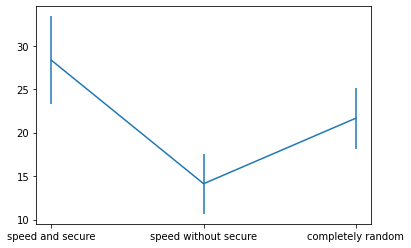

In [263]:
# wykres 1
x = ['speed and secure', 'speed without secure', 'completely random']
y = [
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed])/len(month_of_tasks_speed),
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/len(month_of_tasks_speed_no_sec),
    sum([sum([float(task.predicted_time) for task in day])/len(day) for day in month_totally_random])/len(month_totally_random),
]
stdev = [
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed])/2,
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/2,
    np.std([sum([float(task.predicted_time) for task in day])/len(day) for day in month_totally_random])/2,
]
with open('./plots/numberOne.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one.capitalize()}, {two}, {three}\n')
plt.errorbar(x,y,stdev)

[[0, 5, 47, 15], [0, 6, 28, 23], [0, 11, 22, 28], [0, 0, 19, 37], [0, 0, 0, 59]]


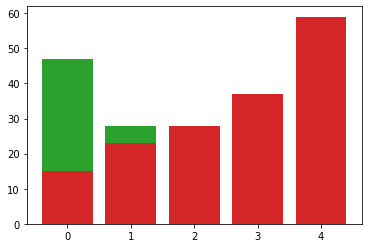

In [28]:
# wykres wybranych serwisów w zależności od bezpieczeństwa
U = [
    'cloud_commercial',
    'cloud_own',
    'pc',
    'mobile'
]
x = [0,1,2,3,4]
y = []
for sec in x:
    d = {u:0 for u in U}
    for day in month_of_tasks_speed:
        for task in day:
            if (int(task.data_security) == sec):
                d[np.array(task.chosen_service)[0]] += 1
        # print(d)
    y.append([d[u] for u in U])
print(y)
y = list(zip(*y))
for yy in y:
    plt.bar(x,yy)

<BarContainer object of 3 artists>

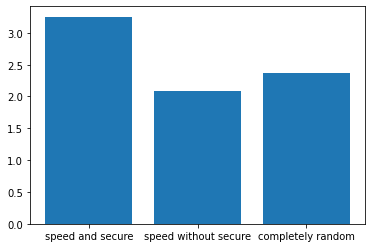

In [259]:
# wykres 2
y = [
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed])/len(month_of_tasks_speed),
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/len(month_of_tasks_speed_no_sec),
    sum([sum([float(task.achieved_security) for task in day])/len(day) for day in month_totally_random])/len(month_totally_random),
]

stdev = [
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed])/2,
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_of_tasks_speed_no_sec])/2,
    statistics.stdev([sum([float(task.achieved_security) for task in day])/len(day) for day in month_totally_random])/2,
]

with open('./plots/numberTwo.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one.capitalize()}, {two}, {three}\n')

plt.bar(x,y)

<BarContainer object of 20 artists>

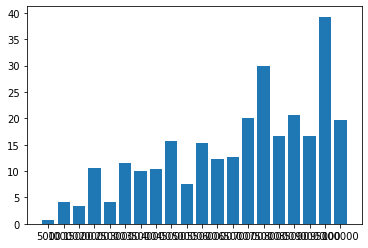

In [264]:
# wykres 4
x = list(range(5000, 100001, 5000))
y_dict = {k:{'sec':[], 'non_sec':[]} for k in x}

for day in month_of_tasks_speed:
    for task in day:
        y_dict[int(task.task_metric)]['sec'].append(float(task.predicted_time))

for day in month_of_tasks_speed_no_sec:
    for task in day:
        y_dict[int(task.task_metric)]['non_sec'].append(float(task.predicted_time))

y = [np.mean(y_dict[metric]['sec']) - np.mean(y_dict[metric]['non_sec']) for metric in x]
stdev = [np.std(np.array(y_dict[metric]['sec']) - np.array(y_dict[metric]['non_sec'])) for metric in x]

with open('./plots/numberFour.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one}, {two}, {three}\n')

plt.bar(list(map(str,x)),y)

In [205]:
y



[0.735311788156273,
 4.113531372761836,
 3.468816482839701,
 10.548229694624384,
 4.216791176226678,
 11.501732094813928,
 9.974952473445587,
 10.42243213579862,
 15.634637453837664,
 7.544591093984209,
 15.397293821692202,
 12.31717944654503,
 12.756493345699557,
 20.094725384339963,
 29.969361914801652,
 16.578296905700117,
 20.65415687868738,
 16.647751991873697,
 39.269193087974735,
 19.611392371840367]

In [265]:

data_with_files = pd.read_csv('tests_with_files.csv', sep=';')
data_with_files.available_connections = data_with_files.available_connections.apply(ast.literal_eval)
data_with_files.available_connections = data_with_files.available_connections.apply(sorted)
data_with_files.available_connections = data_with_files.available_connections.apply(tuple)

In [240]:
C = [
    'wifi_public_no_passwd',
    'wifi_public_passwd',
    'cellular',
    'wifi_priv_known',
]
tasks_with_file = [
    ('540x40',3183),
    ('580x680',8463),
    ('600x120',8493),
    ('720x960',83883),
    ('960x480',33574),
    ('960x1280',98774),
    ('1200x1200',17473),
    ('1600x1200',22769),
]

month_of_tasks_with_file = [[(random.choice(tasks_with_file)[0], tuple(sorted(random.sample(C, random.choice(range(len(C)))))), random.choice(range(5)), random.choice([True, False])) for __ in range(10)] for _ in range(30)]

with open('month_of_tasks_with_file.txt', 'r') as fp:
    fp.write(str(month_of_tasks_with_file))

In [266]:
filtered_by_speed_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed'].reset_index(drop=True)
month_of_tasks_speed_w_f = [[
    filtered_by_speed_w_f[
    (filtered_by_speed_w_f.file_name == execution[0]) &
    (filtered_by_speed_w_f.available_connections == execution[1]) &
    (filtered_by_speed_w_f.data_security == execution[2])
    ]
    for execution in day] for day in month_of_tasks_with_file]

<ipython-input-266-e3c702519a6a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_by_speed_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed'].reset_index(drop=True)


In [268]:
filtered_by_speed_no_sec_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed-not-secure'].reset_index(drop=True)
month_of_tasks_speed_no_sec_w_f = [[
    filtered_by_speed_no_sec_w_f[
    (filtered_by_speed_no_sec_w_f.file_name == execution[0]) &
    (filtered_by_speed_no_sec_w_f.available_connections == execution[1]) &
    (filtered_by_speed_no_sec_w_f.data_security == 0)
    ]
    for execution in day] for day in month_of_tasks_with_file]

<ipython-input-268-749afaa1efe9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_by_speed_no_sec_w_f = data_with_files[data_with_files.with_vpn == False][data_with_files.priority == 'speed-not-secure'].reset_index(drop=True)


<BarContainer object of 8 artists>

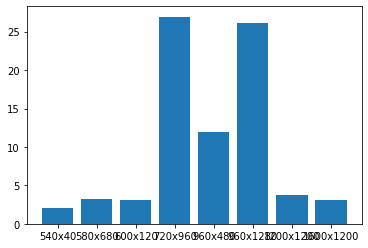

In [269]:
# wykres 3
x = [t[0] for t in tasks_with_file]
y_dict = {k:{'sec':[], 'non_sec':[]} for k in x}

for day in month_of_tasks_speed_w_f:
    for task in day:
        y_dict[str(task.file_name.values[0])]['sec'].append(float(task.predicted_time))

for day in month_of_tasks_speed_no_sec_w_f:
    for task in day:
        y_dict[str(task.file_name.values[0])]['non_sec'].append(float(task.predicted_time))

y = [np.mean(y_dict[metric]['sec']) - np.mean(y_dict[metric]['non_sec']) for metric in x]
stdev = [np.std(np.array(y_dict[metric]['sec']) - np.array(y_dict[metric]['non_sec'])) for metric in x]

with open('./plots/numberThree.dat', 'w') as fp:
    for one, two, three in zip(x, y, stdev):
        fp.write(f'{one}, {two}, {three}\n')

plt.bar(x,y)

In [237]:
month_of_tasks_speed_w_f[0][0].file_name.values[0]

'580x680'